# 2주차 Report

전복(abalone) 데이터를 가지고,

머신러닝 분류, 회귀

신경망 분류, 회귀를 각각 수행하라

## 1. Data Load

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [22]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [23]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [24]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

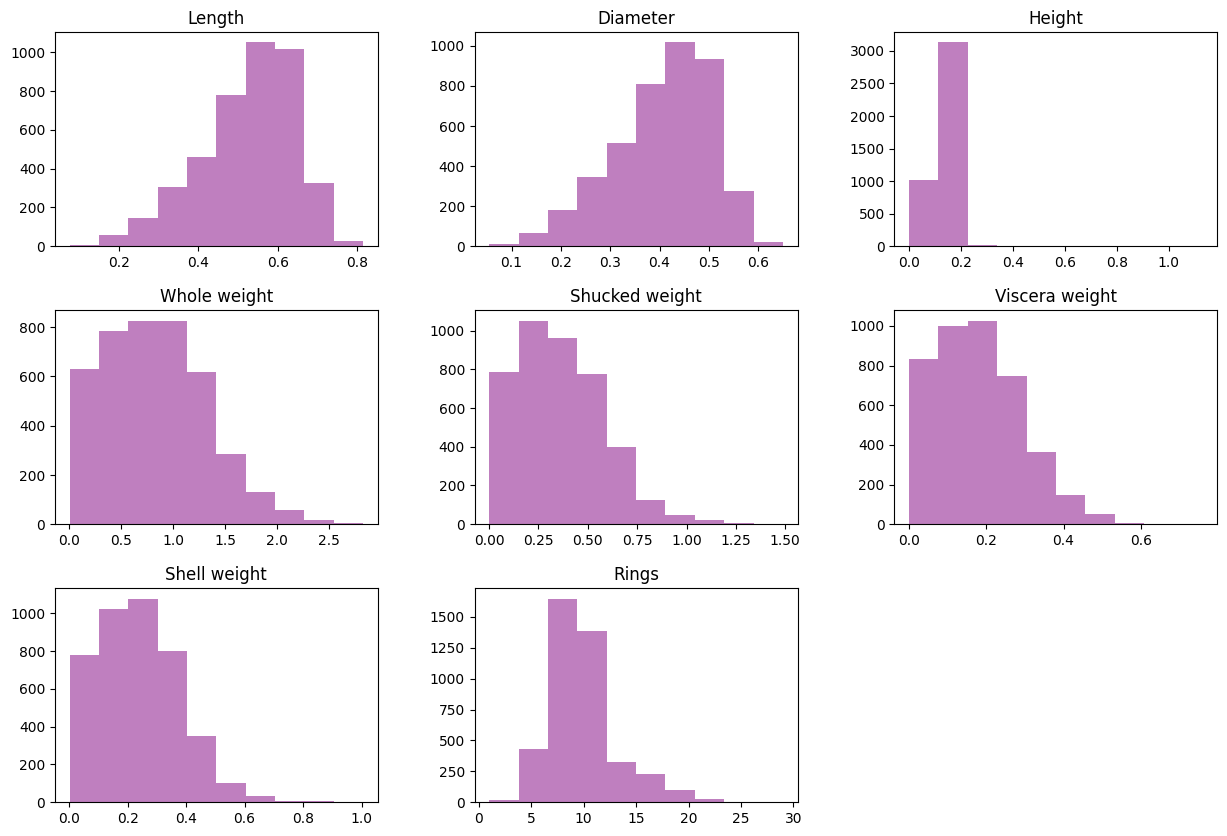

In [25]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='purple')

Text(0.5, 1.0, 'Rings of abalone')

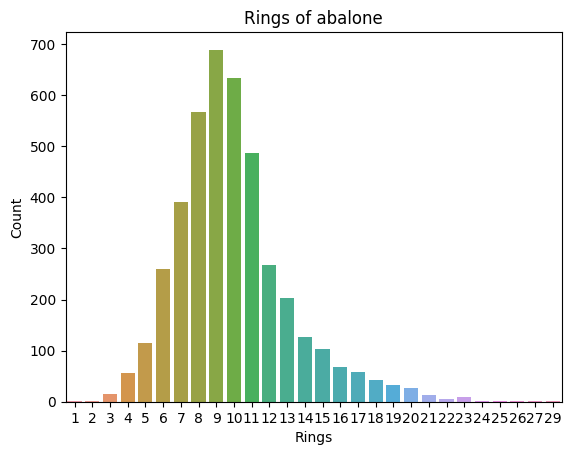

In [26]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings of abalone")

Text(0.5, 1.0, 'Sex of Abalone')

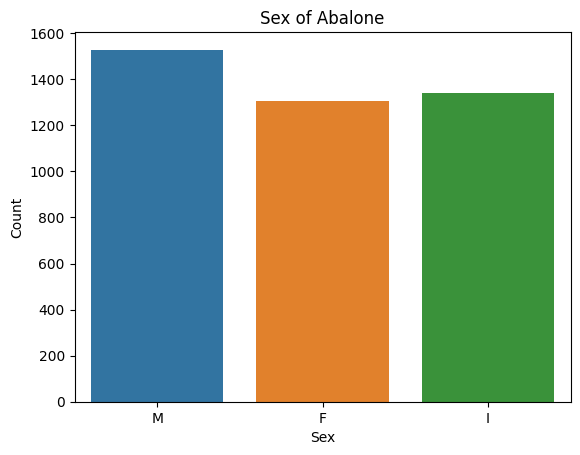

In [27]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex of Abalone")

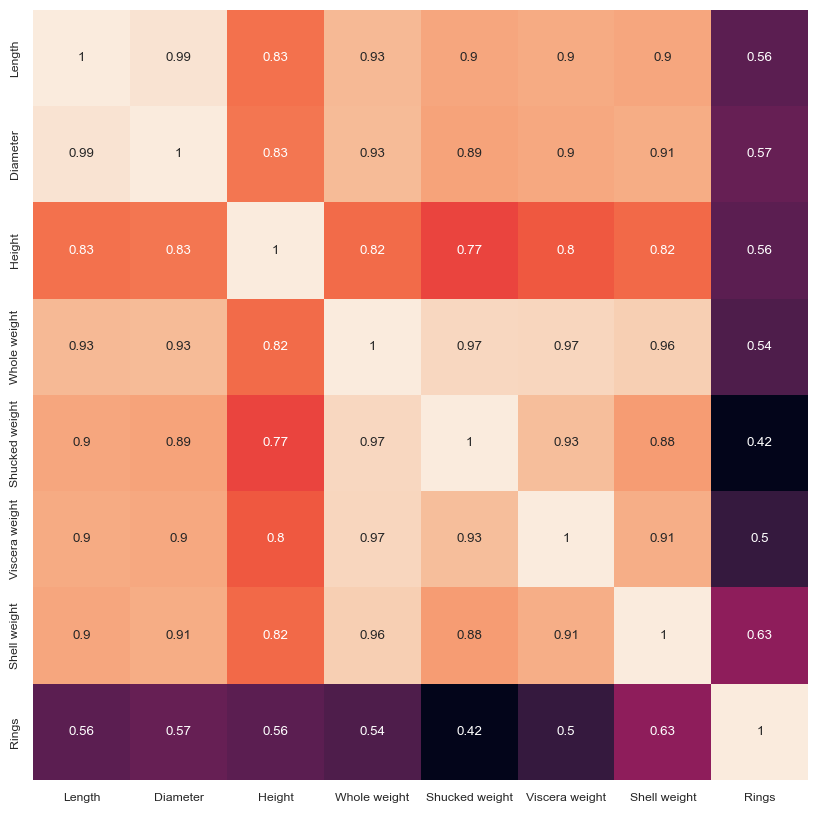

In [28]:
df_corr = df[[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

Ring은 다른 특성들과의 상관관계가 특히 낮다. 

Abalone 데이터에 따르면, Ring 값에 1.5를 더하면 전복의 나이가 된다고 한다.

In [29]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
# df.drop('Rings', axis=1, inplace=True)

In [30]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64

In [31]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
id,,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5


In [32]:
df['Sex'].value_counts()
# 2 M
# 1 I
# 0 F

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

## 2. Train Test Split

In [33]:
X=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [34]:
y=df['Rings']
y.value_counts().sort_index(ascending=True)

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,
3529,0.360,0.265,0.075,0.1785,0.0785,0.0350,0.0540
3901,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775
1783,0.525,0.380,0.125,0.6500,0.3030,0.1550,0.1590
3243,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700
2616,0.650,0.500,0.185,1.4415,0.7410,0.2955,0.3410
...,...,...,...,...,...,...,...
3916,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250
1283,0.500,0.375,0.145,0.5795,0.2390,0.1375,0.1850
3714,0.725,0.560,0.185,1.7920,0.8730,0.3670,0.4350


In [36]:
# Scale X, 피쳐 값을 정규화 한것과 하지 않은 것을 비교해보자.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [37]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.507365,0.470989,0.710110,0.330987,0.294468,0.741343,0.320957
1,0.296013,0.368982,1.296663,0.303376,-0.250959,0.390777,0.684568
2,0.211473,0.317978,-0.111063,0.094765,0.034202,0.254192,0.180553
3,0.507365,0.521992,0.123558,0.028296,-0.097063,-0.132796,0.396560
4,0.126932,0.113965,0.006247,-0.056580,0.038728,-0.082715,-0.215458
...,...,...,...,...,...,...,...
1374,0.972339,1.083030,0.592800,1.096917,1.229163,1.456133,0.850173
1375,-1.690693,-1.722158,-1.518790,-1.391078,-1.305603,-1.066122,-1.417893
1376,0.591906,0.572995,0.123558,0.561072,0.188098,0.545572,0.504563
1377,1.395042,1.338047,1.062042,1.511071,1.507534,1.242151,1.656596


## 3. Machine Learning

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 3.1 Regression

#### 3.1.1 SVR

In [39]:
# SVR 모델 학습
rg_svm = SVR() # Support Vector Regression
rg_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

# 모델 점수 (R^2)
print('--- SVR 모델점수 (R²) ---\n', '{:.5f}'.format(rg_svm.score(X_test, y_test)))

# 테스트 데이터로 예측
pred_svm = rg_svm.predict(X_test)

# 성능 지표 계산
mse = mean_squared_error(pred_svm, y_test)
mae = mean_absolute_error(pred_svm, y_test)

# 결과 출력
print('\n--- MSE (Mean Squared Error) ---')
print('{:.5f}'.format(mse))

print('\n--- MAE (Mean Absolute Error) ---')
print('{:.5f}'.format(mae))


--- SVR 모델점수 (R²) ---
 0.56492

--- MSE (Mean Squared Error) ---
4.54430

--- MAE (Mean Absolute Error) ---
1.47064


#### 3.1.2 LR (Linear Regression)

In [40]:
from sklearn.linear_model import LinearRegression

rg_lr = LinearRegression()
rg_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(rg_lr.score(X_test, y_test)))

pred_lr = rg_lr.predict(X_test)

mse = mean_squared_error(pred_lr, y_test)
mae = mean_absolute_error(pred_lr, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- LR 모델점수 ---
 0.55929

--- MSE ---
4.60310

--- MAE ---
1.56955


#### 3.1.3 RF (Random Forest)

In [41]:
from sklearn.ensemble import RandomForestRegressor

rg_rf = RandomForestRegressor(random_state=5)
rg_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_rf.score(X_test, y_test)))

pred_rf = rg_rf.predict(X_test)

mse = mean_squared_error(pred_rf, y_test)
mae = mean_absolute_error(pred_rf, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- RF 모델점수 ---
 0.56227

--- MSE ---
4.57198

--- MAE ---
1.53634


#### 3.1.4 DT (Decision Tree)

In [42]:
from sklearn.tree import DecisionTreeRegressor
# Build a decision tree classifier and predict

rg_dt = DecisionTreeRegressor(random_state=12)
rg_dt.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_dt.score(X_test, y_test)))

pred_dt = rg_dt.predict(X_test)

mse = mean_squared_error(pred_dt, y_test)
mae = mean_absolute_error(pred_dt, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

--- RF 모델점수 ---
 0.14367

--- MSE ---
8.94416

--- MAE ---
2.08122


### 3.2 Classification (before feature engineering)

In [43]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.394800,-1.467141,-1.518790,-1.337903,-1.276181,-1.334737,-1.338691
1,0.000121,0.215972,-0.345684,-0.040219,-0.131011,-0.141902,-0.449465
2,0.000121,-0.294063,-0.345684,-0.373587,-0.260012,-0.242064,-0.582669
3,1.099150,1.032026,0.475489,0.530394,0.160940,0.918902,0.936575
4,1.056879,0.930019,1.062042,1.245194,1.722537,1.037275,0.727769
...,...,...,...,...,...,...,...
2793,-0.042149,0.011958,0.475489,-0.246784,-0.343750,-0.260275,-0.107455
2794,-0.211231,-0.345066,0.123558,-0.517774,-0.549700,-0.401412,-0.395463
2795,1.690934,1.542060,1.062042,1.962040,2.320017,1.688327,1.404589
2796,-1.521611,-1.467141,-1.166858,-1.369603,-1.353130,-1.316526,-1.378292


#### 3.2.1 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

cl_lr = LogisticRegression()
cl_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(cl_lr.score(X_test, y_test)))

pred_lr = cl_lr.predict(X_test)

ac_score = accuracy_score(pred_lr, y_test)
cf_matrix = confusion_matrix(pred_lr, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- LR 모델점수 ---
 0.27339

--- accuracy score ---
0.27339

--- confusion matrix ---
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  1   4  10   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   2   8  13   5   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   3  19  34  20   3   7   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   6  37  41  34  16  10   3   2   2   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   7  47  70  56  32  15   8   5   1   1   2   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   4  11  56 102  77  53  26  15   7   9   2   2   0   1
    0   0   1   0   0]
 [  0   0   0   0   0   2  18  36  65  65  22  35  18  16   7   1   5   4
    1   2   1   0   0]
 [  0   0   0   0   0   0   1   5  23  34  1

C:\Users\Choij\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3 Classification (after feature engineering)

정확도가 아주 낮게 나오고 있다. 분류 문제인데, 레이블의 범위가 너무 커서 그런것 같다. 레이블을 크게 3가지로 나누어 다시 분류를 해보자.

Simple Logistic Regression Model

No of Classes : 0

1 -> Rings <= 8

2 -> Rings > 8 && Rings <= 11

3 -> Rings > 11

In [45]:
new_df = df.copy()

In [46]:
new_df['newRings_1'] = np.where(df['Rings'] <= 8, 1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10, 3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [47]:
X=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [48]:
X_new = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
y_new = new_df['newRings']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=12)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,newRings
id,,,,,,,,
3529,0.360,0.265,0.075,0.1785,0.0785,0.0350,0.0540,1
3901,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,3
1783,0.525,0.380,0.125,0.6500,0.3030,0.1550,0.1590,1
3243,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,3
2616,0.650,0.500,0.185,1.4415,0.7410,0.2955,0.3410,2
...,...,...,...,...,...,...,...,...
3916,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250,2
1283,0.500,0.375,0.145,0.5795,0.2390,0.1375,0.1850,2
3714,0.725,0.560,0.185,1.7920,0.8730,0.3670,0.4350,3


#### 3.3.1 SVC 

In [50]:
# SVC 모델 학습
rg_svc = SVC() # Support Vector Classifier
rg_svc.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

print('--- SVC 모델점수 (R²) ---\n', '{:.5f}'.format(rg_svc.score(X_test, y_test)))

pred_svc = rg_svc.predict(X_test)

ac_score = accuracy_score(pred_svc, y_test)
cf_matrix = confusion_matrix(pred_svc, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- SVC 모델점수 (R²) ---
 1.00000

--- accuracy score ---
1.00000

--- confusion matrix ---
[[465   0   0]
 [  0 434   0]
 [  0   0 480]]


#### 3.3.2 Logistic Regression

In [51]:
cl_lr = LogisticRegression()
cl_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(cl_lr.score(X_test, y_test)))

pred_lr = cl_lr.predict(X_test)

ac_score = accuracy_score(pred_lr, y_test)
cf_matrix = confusion_matrix(pred_lr, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- LR 모델점수 ---
 1.00000

--- accuracy score ---
1.00000

--- confusion matrix ---
[[465   0   0]
 [  0 434   0]
 [  0   0 480]]


#### 3.3.3 Random Forest

In [52]:
cl_rf = RandomForestClassifier(random_state=5)
cl_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(cl_rf.score(X_test, y_test)))

pred_rf = cl_rf.predict(X_test)

ac_score = accuracy_score(pred_rf, y_test)
cf_matrix = confusion_matrix(pred_rf, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- RF 모델점수 ---
 1.00000

--- accuracy score ---
1.00000

--- confusion matrix ---
[[465   0   0]
 [  0 434   0]
 [  0   0 480]]


#### 3.3.4 Decision Tree

In [53]:
cl_dt = DecisionTreeClassifier(random_state=12)
cl_dt.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(cl_dt.score(X_test, y_test)))

pred_dt = cl_dt.predict(X_test)

ac_score = accuracy_score(pred_dt, y_test)
cf_matrix = confusion_matrix(pred_dt, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- RF 모델점수 ---
 1.00000

--- accuracy score ---
1.00000

--- confusion matrix ---
[[465   0   0]
 [  0 434   0]
 [  0   0 480]]


## 4. Deep Learning

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
import numpy as np

def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

In [4]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
X=df.drop('Rings', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y=df['Rings']
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [8]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
940,1,0.460,0.345,0.105,0.4490,0.1960,0.0945,0.1265
2688,2,0.630,0.465,0.150,1.0270,0.5370,0.1880,0.1760
1948,2,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535
713,2,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695
3743,0,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.5160
...,...,...,...,...,...,...,...,...
1033,2,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,2,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535


In [10]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [11]:
X_train.shape[1]

8

In [12]:
y_test.shape[1]

28

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [14]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(256, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
predictions = Dense(28, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.02), loss='mse', metrics=['mse'])

# Print the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0    

In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
pred_DL = model.predict(X_test)

Epoch 1/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 8/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.03

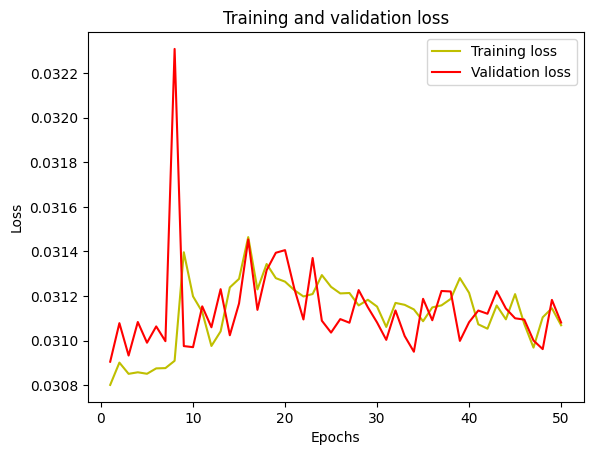

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

In [18]:
pred_DL = model.predict(X_test) # 이번에는 테스트 데이터로 테스트한 값을 pred_DL에 저장

mse = mean_squared_error(pred_DL, y_test)
mae = mean_absolute_error(pred_DL, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))
print('\n--- MAE ---')
print('{:.5f}'.format(mae))

33/33 [==============================] - 0s 708us/step

--- MSE ---
0.03108

--- MAE ---
0.06165


In [19]:
#Accuracy of the predicted values
print(regression_report(y_test, pred_DL))
print('\n')

Metrics for regression:
      mean absolute error:                0.062
    median absolute error:                0.032
       mean squared error:                0.031
                 r2 score:                0.019
 explained variance score:                0.022

Percentiles:
                        5:               -0.184
                       25:               -0.025
                       50:               -0.004
                       75:               -0.001
                       95:               -0.000
None




### 4.2 DL Classification

In [54]:
y_new.value_counts()

3    1447
1    1407
2    1323
Name: newRings, dtype: int64

In [55]:
#one hot encoding 하기

y_new = pd.get_dummies(y_new).values
y_new

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,newRings
id,,,,,,,,
940,0.460,0.345,0.105,0.4490,0.1960,0.0945,0.1265,1
2688,0.630,0.465,0.150,1.0270,0.5370,0.1880,0.1760,1
1948,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535,2
713,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695,1
3743,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.5160,3
...,...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,2
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,3
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,2


In [57]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [58]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Dense(8, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.02), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 979 (3.82 KB)
Trainable params: 979 (3.82 KB)

In [59]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
pred_DL = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/50
98/98 [==============================] - 1s 3ms/step - loss: 0.3153 - accuracy: 0.8764 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9860 - val_loss: 3.7653e-04 - val_accuracy: 1.0000
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9815 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9869 - val_loss: 6.3136e-04 - val_accuracy: 1.0000
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9952 - val_loss: 1.6611e-04 - val_accuracy: 1.0000
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 1.2181e-04 - val_accuracy: 1.0000
Epoch 7/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9936 - val_loss: 4.1465e-05 - val_accuracy: 1.0000


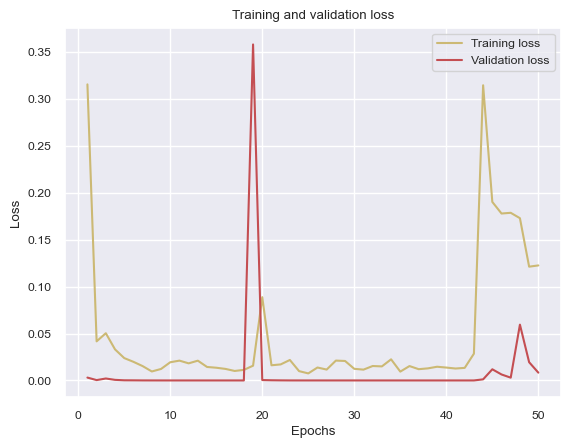

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

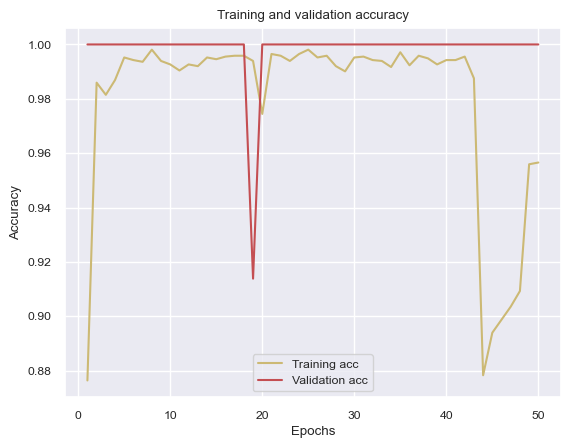

In [61]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       291
           2       1.00      1.00      1.00       378

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

[[376   0   0]
 [  0 291   0]
 [  0   0 378]]
